In [87]:
import os

In [88]:
import pandas as pd

In [89]:
wines=pd.read_csv("WineQT.csv")

In [92]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
wines.describe()

In [12]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [15]:
import matplotlib.pyplot as plt

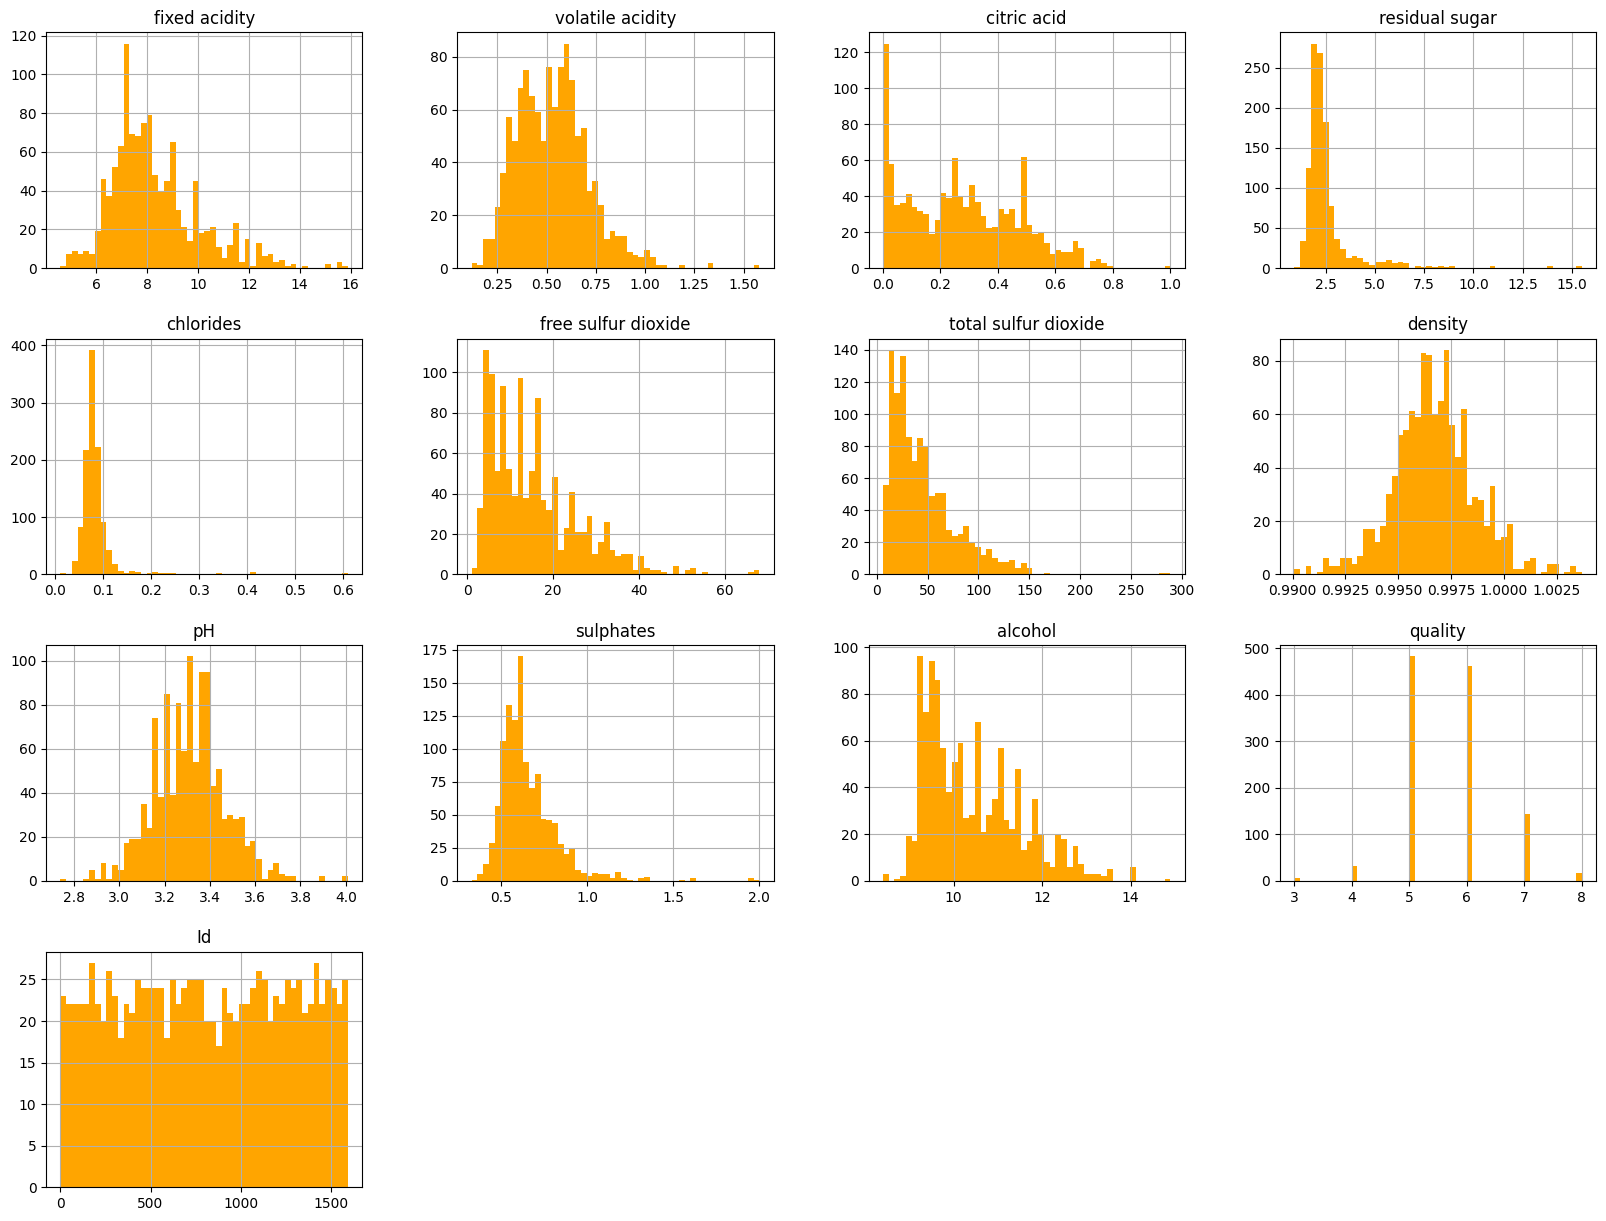

In [19]:
wines.hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [29]:
x=wines.drop(["quality"],axis=1)
y=wines["quality"]

In [30]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [31]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 12)
(229, 12)
(914,)
(229,)


In [34]:
from sklearn.linear_model import ElasticNet

In [80]:
lr=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
lr.fit(x_train,y_train)

,alpha,0.1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
# y_pred=lr.predict(x_test)

In [82]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)
    return rmse,mae,r2

In [83]:
predicted_value=lr.predict(x_test)

In [84]:
predicted_value

array([5.41827018, 5.11124249, 5.47220991, 5.27146275, 6.35194597,
       6.49994323, 5.41305884, 5.19195673, 5.70485351, 5.3980524 ,
       6.27045638, 5.92748989, 5.74737186, 6.14964586, 5.85425439,
       5.56051331, 5.5014995 , 5.67549416, 5.42078388, 6.20175259,
       5.74908949, 5.88520389, 5.21947575, 6.15249646, 5.6468529 ,
       5.41428448, 6.3145176 , 5.86278447, 5.35666361, 5.57796355,
       6.39874219, 5.54267933, 6.4496524 , 5.67001657, 5.75237299,
       5.26007007, 5.67783963, 5.80701407, 6.5990968 , 5.14814451,
       5.98899061, 5.67122952, 6.68134479, 5.48775059, 5.42112696,
       5.37167409, 5.91657362, 5.90908389, 5.1220525 , 5.88900446,
       6.21305379, 5.61952411, 5.61123571, 5.699142  , 5.51902632,
       6.23358344, 5.74317845, 5.75628747, 5.51127107, 5.42736815,
       5.51287797, 5.98921461, 5.72192076, 5.9337469 , 6.02348539,
       5.59003484, 6.52929783, 5.21137133, 5.18590923, 5.97240397,
       5.34815543, 5.36882586, 5.31793627, 6.19542595, 5.55907

In [85]:
(rmse,mae,r2)=eval_metrics(y_test,predicted_value)

In [86]:
print("RMSE:",rmse)
print("MAE:",mae)
print("R2:",r2)

RMSE: 0.629995959330732
MAE: 0.5034416470825984
R2: 0.2867669826959264
